## Resnet18 muti sz

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Import basic libraries
import matplotlib.pyplot as plt
import numpy as np
import os,shutil

# Fastai reloads
%reload_ext autoreload
%autoreload 2
%matplotlib inline

#Impost fastai
from fastai.vision import *
from fastai.metrics import error_rate,accuracy
from fastai.callbacks import *
from fastai.imports import *
from fastai.callbacks.mem import PeakMemMetric

from pathlib import Path

from torchvision.models import *
from torch.nn import CrossEntropyLoss
import cv2
#import pretrainedmodels

from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
import seaborn as sns

In [3]:
PATH=Path('data/')

In [4]:
PATH.ls()

[PosixPath('data/rn34-stage1_data-history.csv'),
 PosixPath('data/dense121-stage2-history.csv'),
 PosixPath('data/train_resized_grey'),
 PosixPath('data/rnext101_32-praug-stage4-history.csv'),
 PosixPath('data/rn50-praug-grey-stage2-history.csv'),
 PosixPath('data/submission_resnet18_multisz-210.csv'),
 PosixPath('data/img210-rn50-stage1-history.csv'),
 PosixPath('data/submission_resnet50_noval_full_tta_unfreeze.csv'),
 PosixPath('data/rnext101_32-praug-stage1-history.csv'),
 PosixPath('data/img210-rn50-stage3-history.csv'),
 PosixPath('data/submission_places_resnet50.csv'),
 PosixPath('data/submission_densenet121.csv'),
 PosixPath('data/rn50-praug-stage3-history.csv'),
 PosixPath('data/rn18-stage3-history.csv'),
 PosixPath('data/rn34-stage2-history.csv'),
 PosixPath('data/places_resnet50-stage3-history.csv'),
 PosixPath('data/dense121-stage1-history.csv'),
 PosixPath('data/shufflenetx1_0-stage1-history.csv'),
 PosixPath('data/rn50-praug-grey-stage4-history.csv'),
 PosixPath('data/rn34

## Create Data block (Try with 1/4 size)

In [5]:
tfms=get_transforms(max_rotate=20,max_zoom=1.3,p_lighting=.8,
                    xtra_tfms=[cutout(n_holes=(1,4), length=(5, 10), p=.75), jitter(magnitude=0.005, p=.25)])

In [6]:
img=open_image(PATH/'train_resized_210'/os.listdir(PATH/'train_resized_210')[1])

In [7]:
img.shape

torch.Size([3, 210, 210])

In [8]:
src_size=np.array(img.shape[1:]);src_size

array([210, 210])

In [9]:
np.random.seed(42)
src = (ImageList.from_csv(PATH, 'train.csv', folder='train_resized_210')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' ')
      .add_test_folder('test_resized_210'))

In [10]:
data = (src.transform(tfms, size=src_size//4)
        .databunch(bs=256).normalize(imagenet_stats))        

In [11]:
data.classes

['1', '2', '3', '4', '5']

In [12]:
data

ImageDataBunch;

Train: LabelList (5002 items)
x: ImageList
Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52)
y: MultiCategoryList
1,1,2,3,2
Path: data;

Valid: LabelList (1250 items)
x: ImageList
Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52)
y: MultiCategoryList
4,1,1,3,4
Path: data;

Test: LabelList (2680 items)
x: ImageList
Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52)
y: EmptyLabelList
,,,,
Path: data

## Try with ResNET 18

In [13]:
#f1 = partial(fbeta, thresh=0.2, beta = 1)

In [14]:
metrics_custom=[fbeta,accuracy_thresh]

In [15]:
learn=cnn_learner(data,models.resnet18,metrics=metrics_custom)

In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


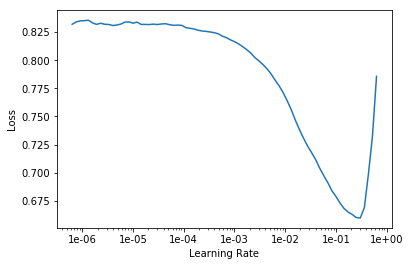

In [17]:
learn.recorder.plot()

In [18]:
lr=2e-2

In [19]:
learn.fit_one_cycle(25,slice(lr),wd=1e-3)

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,time
0,0.738098,0.575040,0.572419,0.725280,00:07
1,0.634499,0.416986,0.643675,0.835520,00:08
2,0.542489,0.389416,0.636252,0.836960,00:09
3,0.485250,0.361415,0.671900,0.842880,00:08
4,0.444308,0.334815,0.695014,0.856800,00:05
5,0.413678,0.331266,0.710652,0.860000,00:05
6,0.390414,0.309170,0.725676,0.869920,00:06
7,0.369973,0.296371,0.736686,0.873440,00:09
8,0.349217,0.278244,0.765562,0.880960,00:08
9,0.331545,0.267661,0.771067,0.880960,00:08


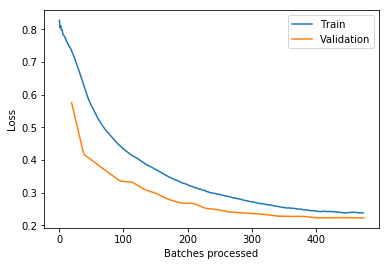

In [20]:
learn.recorder.plot_losses()

In [21]:
learn.unfreeze()

In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


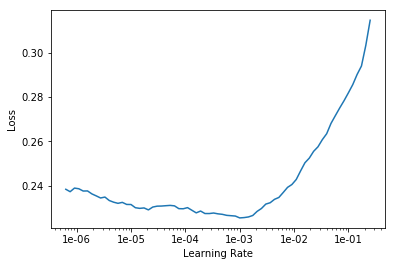

In [23]:
learn.recorder.plot()

In [24]:
lr=9e-4

In [25]:
learn.fit_one_cycle(15,slice(lr,3e-2))

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,time
0,0.248562,0.272687,0.791410,0.893120,00:09
1,0.238194,0.332592,0.777333,0.892960,00:08
2,0.231754,0.616907,0.666438,0.857600,00:05
3,0.230722,0.360077,0.786267,0.904800,00:06
4,0.225502,0.277924,0.799371,0.901760,00:09
5,0.216770,0.244293,0.811224,0.906560,00:08
6,0.207570,0.243716,0.809010,0.898720,00:09
7,0.198132,0.222644,0.838743,0.917760,00:05
8,0.184804,0.203830,0.838038,0.917760,00:05
9,0.172159,0.176221,0.868743,0.932160,00:08


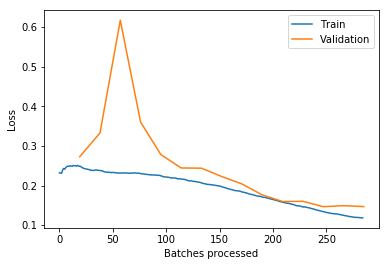

In [26]:
learn.recorder.plot_losses()

In [27]:
learn.save('resnet-5-imagenet-onefrth-stage-2-img210')

In [28]:
learn.load('resnet-5-imagenet-onefrth-stage-2-img210')

Learner(data=ImageDataBunch;

Train: LabelList (5002 items)
x: ImageList
Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52)
y: MultiCategoryList
1,1,2,3,2
Path: data;

Valid: LabelList (1250 items)
x: ImageList
Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52)
y: MultiCategoryList
4,1,1,3,4
Path: data;

Test: LabelList (2680 items)
x: ImageList
Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52)
y: EmptyLabelList
,,,,
Path: data, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bia

## Pass 1/3rd size

In [29]:
data = (src.transform(tfms, size=src_size//3)
        .databunch(bs=256).normalize(imagenet_stats))  

In [30]:
learn.data=data

In [31]:
learn.freeze()

In [32]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


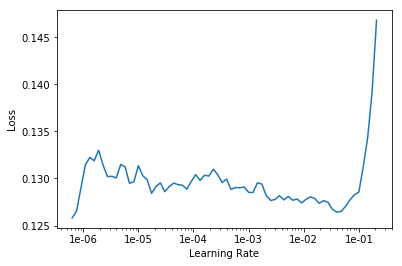

In [33]:
learn.recorder.plot()

In [34]:
lr=2e-3

In [35]:
learn.fit_one_cycle(15,max_lr=slice(lr))

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,time
0,0.130363,0.156841,0.881524,0.940960,00:09
1,0.129234,0.155703,0.882400,0.941120,00:09
2,0.127202,0.152423,0.881486,0.942080,00:09
3,0.125786,0.152389,0.879714,0.941280,00:07
4,0.122843,0.150654,0.886133,0.943840,00:05
5,0.122254,0.148356,0.888457,0.942400,00:05
6,0.121878,0.146368,0.887105,0.943520,00:05
7,0.121477,0.146627,0.884857,0.943360,00:05
8,0.121045,0.144316,0.890191,0.944480,00:06
9,0.119353,0.145608,0.884267,0.943360,00:06


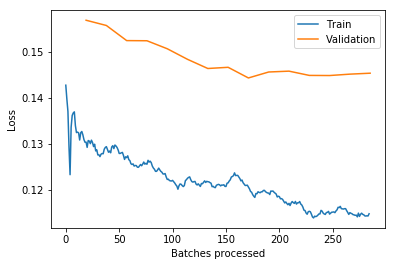

In [36]:
learn.recorder.plot_losses()

In [37]:
learn.save('resnet-5-imagenet-onethrd-stage-3-210')

In [38]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


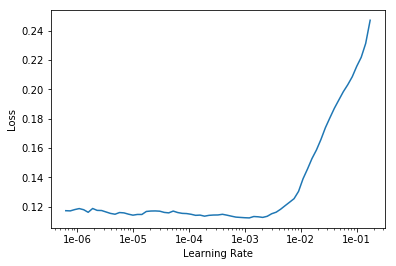

In [39]:
learn.lr_find()
learn.recorder.plot()

In [40]:
lr=5e-4
learn.fit_one_cycle(10,max_lr=slice(lr,2e-3))

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,time
0,0.116118,0.137734,0.895105,0.944320,00:07
1,0.109467,0.171788,0.871810,0.937440,00:05
2,0.105503,0.138202,0.899752,0.947040,00:05
3,0.106106,0.180760,0.873257,0.936000,00:05
4,0.102872,0.158833,0.884533,0.946240,00:06
5,0.095627,0.160335,0.881010,0.939360,00:05
6,0.089552,0.128681,0.904343,0.953280,00:05
7,0.082678,0.124235,0.907181,0.955680,00:05
8,0.075828,0.121860,0.906971,0.957280,00:05
9,0.070912,0.122190,0.906381,0.957120,00:06


In [41]:
learn.fit_one_cycle(5,max_lr=slice(lr,2e-3))

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,time
0,0.060952,0.126127,0.907619,0.955520,00:05
1,0.069412,0.200699,0.864952,0.932960,00:07
2,0.072848,0.134368,0.899981,0.949920,00:07
3,0.068592,0.128424,0.903124,0.953280,00:09
4,0.062526,0.122809,0.909791,0.954240,00:09


In [42]:
learn.save('resnet-5-imagenet-onethrd-stage-4-210')

## Pass half size

In [43]:
data = (src.transform(tfms, size=src_size//2)
        .databunch(bs=128).normalize(imagenet_stats))

In [44]:
learn.data=data

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


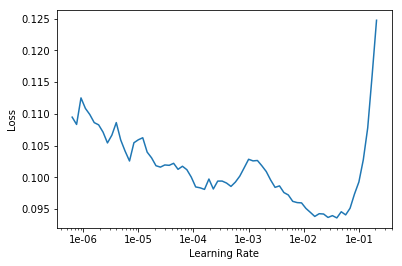

In [45]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [46]:
lr=3e-4
learn.fit_one_cycle(12,max_lr=slice(lr),wd=1e-3)

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,time
0,0.102935,0.130854,0.900705,0.950720,00:09
1,0.103611,0.131396,0.899733,0.950880,00:08
2,0.102301,0.127970,0.902800,0.952000,00:08
3,0.098165,0.124966,0.901238,0.952960,00:08
4,0.097735,0.123392,0.903410,0.952960,00:08
5,0.099150,0.121480,0.904724,0.952320,00:09
6,0.097952,0.121560,0.905981,0.953920,00:09
7,0.095710,0.119700,0.905486,0.952960,00:09
8,0.097231,0.119109,0.904648,0.954080,00:08
9,0.094018,0.120606,0.905848,0.954080,00:09


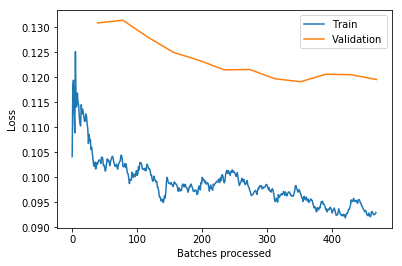

In [47]:
learn.recorder.plot_losses()

In [48]:
learn.save('resnet-5-imagenet-half-stage-5-210')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


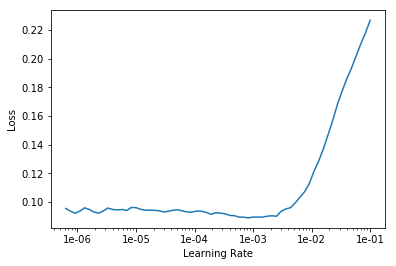

In [49]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [50]:
lr=1e-4
learn.fit_one_cycle(15,max_lr=slice(lr,3e-4))

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,time
0,0.093914,0.113350,0.912000,0.955520,00:05
1,0.085618,0.110965,0.915105,0.954720,00:06
2,0.078712,0.102280,0.923390,0.957760,00:08
3,0.072076,0.114990,0.910724,0.957760,00:09
4,0.066613,0.106082,0.917029,0.960480,00:09
5,0.060950,0.107946,0.923295,0.960160,00:09
6,0.054162,0.115039,0.920114,0.958080,00:09
7,0.051837,0.103111,0.925638,0.964480,00:09
8,0.047842,0.117152,0.915390,0.959200,00:09
9,0.041984,0.109889,0.923772,0.959680,00:09


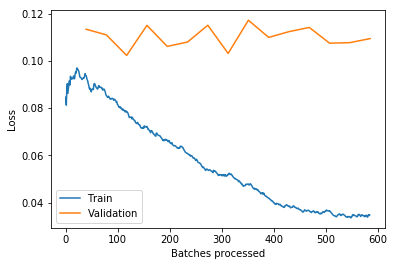

In [51]:
learn.recorder.plot_losses()

In [52]:
learn.save('resnet-5-imagenet-half-stage-6-210')

## Pass full size image

In [53]:
data = (src.transform(tfms, size=src_size)
        .databunch(bs=128).normalize(imagenet_stats))

In [54]:
learn.data=data

In [55]:
learn.data

ImageDataBunch;

Train: LabelList (5002 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: MultiCategoryList
1,1,2,3,2
Path: data;

Valid: LabelList (1250 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: MultiCategoryList
4,1,1,3,4
Path: data;

Test: LabelList (2680 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: EmptyLabelList
,,,,
Path: data

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


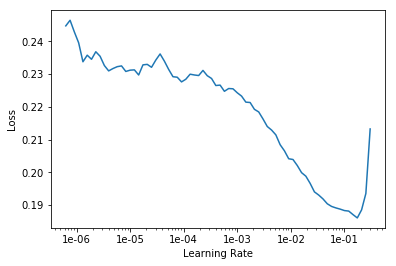

In [56]:
learn.load('resnet-5-imagenet-half-stage-6-210')
learn.freeze()
learn.data=data
learn.lr_find()
learn.recorder.plot()

In [57]:
lr=1e-2
learn.fit_one_cycle(15,slice(lr),wd=1e-3)

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,time
0,0.220453,0.209861,0.844362,0.920960,00:16
1,0.185820,0.167229,0.872043,0.932320,00:15
2,0.158769,0.150140,0.886581,0.939200,00:16
3,0.140177,0.145847,0.888557,0.940480,00:15
4,0.126375,0.130598,0.901733,0.944000,00:11
5,0.115874,0.136021,0.893562,0.946880,00:10
6,0.106160,0.125713,0.907848,0.951360,00:10
7,0.100248,0.125187,0.909733,0.951360,00:15
8,0.092627,0.124900,0.905543,0.954560,00:17
9,0.093401,0.118407,0.907981,0.954240,00:17


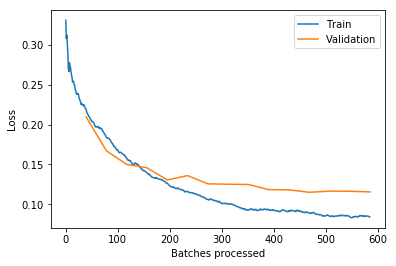

In [58]:
learn.recorder.plot_losses()

In [59]:
learn.save('resnet-5-imagenet-full-stage-7-210')

In [60]:
learn.load('resnet-5-imagenet-full-stage-7-210')

Learner(data=ImageDataBunch;

Train: LabelList (5002 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: MultiCategoryList
1,1,2,3,2
Path: data;

Valid: LabelList (1250 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: MultiCategoryList
4,1,1,3,4
Path: data;

Test: LabelList (2680 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: EmptyLabelList
,,,,
Path: data, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stri

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


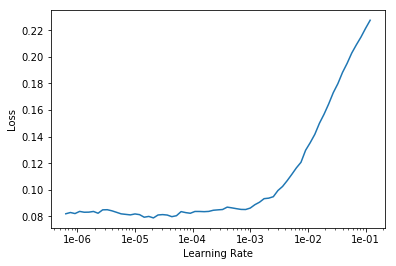

In [61]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [62]:
lr=2e-4
learn.fit_one_cycle(20,max_lr=slice(lr,1e-3))

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,time
0,0.083348,0.112265,0.915600,0.956160,00:18
1,0.080707,0.112839,0.917695,0.955040,00:16
2,0.075915,0.128544,0.897543,0.953600,00:13
3,0.073502,0.131867,0.900362,0.947520,00:10
4,0.069115,0.160376,0.882419,0.941280,00:19
5,0.064797,0.125175,0.909676,0.953600,00:18
6,0.061859,0.130651,0.908057,0.952640,00:12
7,0.054130,0.141313,0.905848,0.955040,00:18
8,0.047879,0.119108,0.917471,0.959520,00:17
9,0.041450,0.118904,0.925771,0.961760,00:16


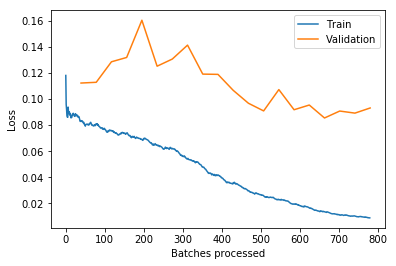

In [63]:
learn.recorder.plot_losses()

In [64]:
learn.save('resnet-5-imagenet-full-stage-8')

In [65]:
test_pred_tta=learn.TTA(ds_type=DatasetType.Test)

In [66]:
test_pred_tta

(tensor([[9.1859e-01, 4.9479e-02, 2.2023e-02, 3.1350e-03, 6.0367e-04],
         [4.7608e-05, 1.6654e-04, 9.9961e-01, 1.4385e-04, 3.0421e-04],
         [6.3200e-01, 1.7642e-02, 1.6656e-03, 9.6341e-02, 2.5951e-01],
         ...,
         [2.8216e-03, 3.6683e-03, 9.8517e-01, 5.2705e-03, 7.2787e-03],
         [2.0322e-02, 9.7324e-01, 4.6723e-04, 1.1087e-02, 4.9207e-03],
         [9.9668e-01, 8.7877e-04, 5.1012e-04, 1.6769e-04, 1.7858e-03]]),
 tensor([0, 0, 0,  ..., 0, 0, 0]))

In [67]:
preds = np.argmax(test_pred_tta[0], 1)
preds

tensor([0, 2, 0,  ..., 2, 1, 0])

In [68]:
a=array(preds)

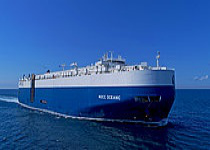

In [69]:
data.test_ds.x[1]

In [70]:
test_img_names = [Path(i).name for i in learn.data.test_ds.x.items]

In [71]:
submission = pd.DataFrame({'image': test_img_names, 'category': a+1})
submission.head(10)

,image,category
0,2904735.jpg,1
1,2890616.jpg,3
2,2902677.jpg,1
3,2741468.jpg,4
4,2802610.jpg,5
5,1630950.jpg,4
6,2882184.jpg,3
7,2787793.jpg,2
8,2866032.jpg,1
9,2369442.jpg,2


In [72]:
len(submission)

2680

In [73]:
submission.to_csv(PATH/'submission_resnet18_multisz-210.csv',index=False)

## Merge the validation set

In [78]:
np.random.seed(42)
src = (ImageList.from_csv(PATH, 'train.csv', folder='train_resized')
       .split_by_rand_pct(0)
       .label_from_df(label_delim=' ')
      .add_test_folder('test_resized'))

In [79]:
data = (src.transform(tfms, size=src_size)
        .databunch(bs=128).normalize(imagenet_stats))

In [82]:
data

ImageDataBunch;

Train: LabelList (6252 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: MultiCategoryList
1,1,2,3,2
Path: data;

Valid: LabelList (0 items)
x: ImageList

y: MultiCategoryList

Path: data;

Test: LabelList (2680 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: EmptyLabelList
,,,,
Path: data

In [84]:
learn.load('resnet-5-imagenet-full-stage-8')

Learner(data=ImageDataBunch;

Train: LabelList (5002 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: MultiCategoryList
1,1,2,3,2
Path: data;

Valid: LabelList (1250 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: MultiCategoryList
4,1,1,3,4
Path: data;

Test: LabelList (2680 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: EmptyLabelList
,,,,
Path: data, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stri

In [85]:
learn.data=data

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


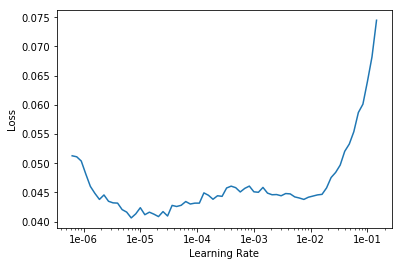

In [86]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [87]:
lr=9e-6
learn.fit_one_cycle(15,max_lr=slice(lr)).mixup().to_f16()

AttributeError: 'NoneType' object has no attribute 'mixup'

In [88]:
learn.save('resnet-5-imagenet-full-stage-8-noval')

In [89]:
test_pred_tta=learn.TTA(ds_type=DatasetType.Test)

In [90]:
preds = np.argmax(test_pred_tta[0], 1)
a=array(preds)
submission = pd.DataFrame({'image': test_img_names, 'category': a+1})
submission.to_csv(PATH/'submission_resnet18_multisz-noval.csv',index=False)